# Importing basic libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data set


In [2]:
data=pd.read_csv('car_age_price.csv')


# PDA

In [3]:
data.shape

(112, 2)

In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [8]:
data.isna().sum()

Year     0
Price    0
dtype: int64

from PDA we can find that here is no null values in the data,and the given data is in integer type. so we don't have to do any data preprocessing.

# Heatmap of correlation matrix

<AxesSubplot:>

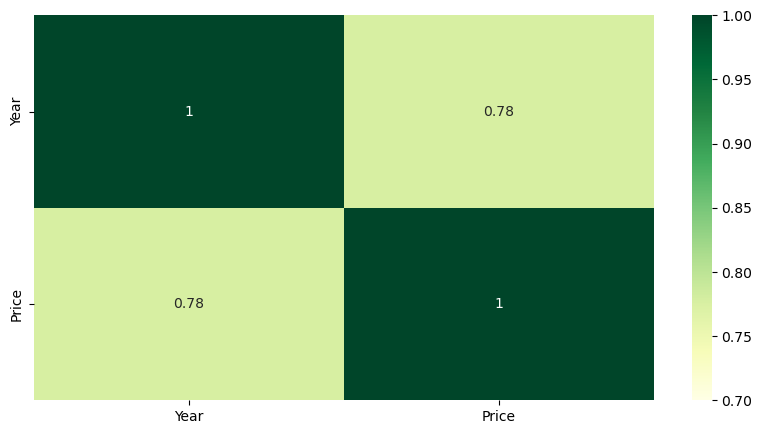

In [5]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(corrmatrix,annot=True,cmap='YlGn',vmin=0.7,vmax=1)

Here the correlation between year and car price is 0.78 which indicates a strong positive correlation in the given data

# Independent and dependent variable

Here 'year' is the independent variable(x) and car price is the dependent variable(y)

In [6]:
y=data['Price']
x=data.drop(['Price'],axis=1)

# split the data for training and testing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [9]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

# Fitting the model

In [10]:
model=lr.fit(x_train,y_train)



In [11]:
y_train_pred = model.predict(x_train)
y_train_pred

array([364327.99581331, 411307.01125886, 505265.04214995, 599223.07304104,
       552244.05759549, 505265.04214995, 505265.04214995, 364327.99581331,
       411307.01125886, 505265.04214995, 411307.01125886, 411307.01125886,
       458286.0267044 , 411307.01125886, 646202.08848657, 505265.04214995,
       505265.04214995, 364327.99581331, 505265.04214995, 458286.0267044 ,
       505265.04214995, 599223.07304104, 411307.01125886, 646202.08848657,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 552244.05759549,
       599223.07304104, 411307.01125886, 505265.04214995, 552244.05759549,
       505265.04214995, 552244.05759549, 411307.01125886, 458286.0267044 ,
       411307.01125886, 505265.04214995, 505265.04214995, 505265.04214995,
       317348.98036776, 411307.01125886, 599223.07304104, 411307.01125886,
       505265.04214995, 364327.99581331, 411307.01125886, 599223.07304104,
       364327.99581331, 4

In [17]:
y_train

81     390000
77     325000
15     500000
30     650000
45     450000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 84, dtype: int64

In [12]:
y_pred = model.predict(x_test)
y_pred

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [13]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

# Checking the ouput by formula method

In [20]:
model.intercept_  #Regression constant

-94251409.11151339

In [22]:
model.coef_ # regression coefficient(slope)

array([46979.01544554])

Y= a+bx # where a is the constant and b is the slope

In [24]:
y_pred =model.intercept_+ model.coef_*x_test

In [25]:
y_pred

,Year
40,599223.073041
65,505265.042150
4,552244.057595
47,552244.057595
42,552244.057595
69,411307.011259
26,505265.042150
11,552244.057595
10,599223.073041
44,599223.073041


We got the same ouput for both method.

# Lets explore the model fitting by using scatter plot

Text(0, 0.5, 'Price')

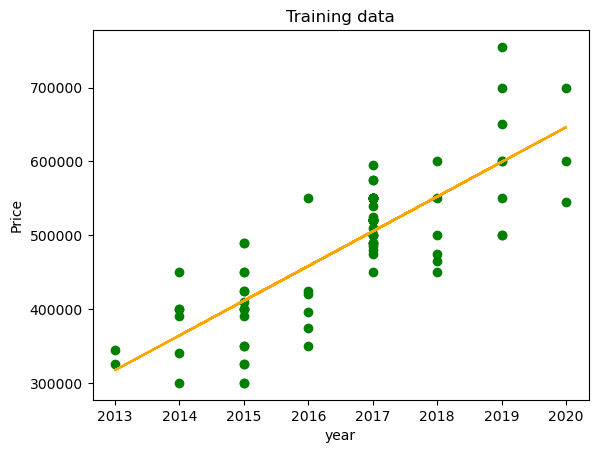

In [19]:
plt.plot(x_train,y_train,"o",color='green')
plt.plot(x_train,y_train_pred,color="orange")
plt.title("Training data")
plt.xlabel("year")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

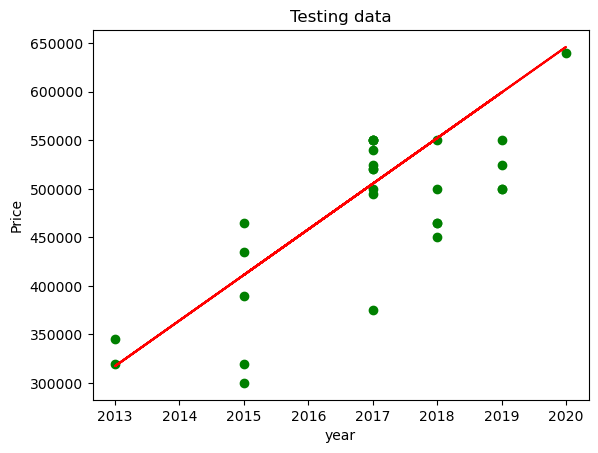

In [20]:
plt.plot(x_test,y_test,"o",color='green')
plt.plot(x_test,y_pred,color="red")
plt.title("Testing data")
plt.xlabel("year")
plt.ylabel("Price")

from the scatter plot we can make a conclusion that we obatin an accurate fitting of model,since the predicted line covering most of the concenterted point areas.And we can see that the residulas will be minimum in this case.

# checking the model accuracy

# Mean absolute error

In [14]:
from sklearn.metrics import mean_absolute_error
print('MAE = ',mean_absolute_error(y_train,y_train_pred))

MAE =  45128.77034686967


# Mean sqaured error

In [22]:
from sklearn.metrics import mean_squared_error
print('MSE = ',mean_squared_error(y_test,y_pred))

MSE =  3878767151.073449


# R2 score

In [24]:
from sklearn.metrics import r2_score
print('r2 score = ',r2_score(y_test,y_pred))

r2 score =  0.4347961632108023


As we can the r2 score for the testing data is 0.4347, hence we can conclude that we have found a good fitting model for the given data.

# Predicting the possible price of a 2022 model second-hand grand i10

In [25]:
y_pred=model.predict([[2022]])
y_pred

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([740160.11937766])

The possible price of a 2022 model second-hand grand i10 is 740160.12 rupees

# Lasso regression method

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction.
This regression model uses shrinkage.Here alpha term denotes the amount shrinkage that will be implemented in the eqauation.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso=Lasso(alpha=1)

In [30]:
model=lasso.fit(x_train,y_train)

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

In [33]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
66     525000
90     520000
62     540000
22     434999
85     320000
Name: Price, dtype: int64

# checking the model accuracy

In [16]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MSE = ',mean_squared_error(y_test,y_pred))
print('MSE = ',mean_absolute_error(y_test,y_pred))
print('r2 score = ',r2_score(y_test,y_pred))

MSE =  3878767151.073449
MSE =  49985.62530006309
r2 score =  0.4347961632108023


In [36]:
y_pred=model.predict([[2022]])
y_pred

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([740157.95700142])

# Here the scores of regression are almost the same in both methods, but as we can see the lasso regression method gives a slightly more accurate fitting of the model.